Aluno: Pedro Siade Ferreira

Matricula: 202004734

Parte 1

In [81]:
%matplotlib inline
import cv2 # importa opencv
import numpy as np # importa numpy
import matplotlib.pyplot as plt
import sys
import math
import time

In [82]:
def montarFiltroGaussiano(m,n, sigma):
    # chamada ex.: h = montarFiltroGaussiano(3,3,3)
    # iniciliza o filtro h
    h = np.zeros((m,n), dtype = np.float32)
    # calcula os deslocamentos
    a = (m-1)/2
    b = (n-1)/2
    for x in range(m):
          for y in range(n):
                h[x,y] = np.exp(-(((x-a)**2) + ((y-b)**2))/(2*(sigma**2)))
    h = h/np.sum(h)
    return h

In [83]:
def filtroTamanhoArbitrario(img, filtro):
  M, N = img.shape
  s = 1 / np.sum(filtro) #suma dos coeficientes da matriz do filtro a fim de normalizar a mesma
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))
  imgFiltrada = img.copy() #copia da imagem a fim de não modificar a principal e causar erros
  for v in range(L, N - L):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(K, M - K):
      sum = 0
      for j in range(-L, L+1):
        for i in range(-K, K+1):
          p = img[u+i, v+j]
          c = filtro[j+L-1][i+K-1]
          sum = sum + (c * p)
      q = np.round(sum * s)
      if q < 0:
         q = 0
      elif q > 255:
         q = 255
      imgFiltrada[u, v] = q
  return imgFiltrada

In [84]:

def filtro_mediana(img):
    M, N = img.shape
    filtro = np.ones((3,3))
    K = int(math.floor(len(filtro[0]) / 2))
    L = int(math.floor(len(filtro) / 2))
    imgFiltrada = img.copy() 
    for v in range(L, N - L):
        for u in range(K, M - K):             
            auxMediana = []
            for j in range(-L, L+1):           
                for i in range(-K, K+1):          
                    p = img[u+i, v+j]             
                    auxMediana.append(p) #adiciona no vetor auxiliar
            auxMediana.sort() #ordena o mesmo
            imgFiltrada[u, v] = np.median(auxMediana) #seleciona o elemento central
    return imgFiltrada

In [85]:
def filtroMedia(img, tamanho):
    M, N = img.shape
    imgFiltrada = img.copy() 
    K = tamanho//2 
    L=K
    for v in range(L, N - L):
        for u in range(K, M - K):             
            sum = 0                          
            for j in range(-K,K+1):   
                for i in range(-L,L+1):
                    p = img[u+i][v+j]
                    sum = sum + p
            aux = sum/(tamanho*tamanho)   
            q = int(round(aux)) 
            imgFiltrada[u,v] = q  
    return imgFiltrada

In [86]:
h1 = montarFiltroGaussiano(5,5,1)
h3 = montarFiltroGaussiano(5,5,3)
h2 = montarFiltroGaussiano(5,5,2)
print(h1)
print('--------------')
print(h2)
print('--------------')
print(h3)




[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.05963429 0.09832032 0.05963429 0.01330621]
 [0.02193823 0.09832032 0.1621028  0.09832032 0.02193823]
 [0.01330621 0.05963429 0.09832032 0.05963429 0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
--------------
[[0.02324684 0.03382396 0.03832756 0.03382396 0.02324684]
 [0.03382396 0.04921356 0.05576627 0.04921356 0.03382396]
 [0.03832756 0.05576627 0.06319147 0.05576627 0.03832756]
 [0.03382396 0.04921356 0.05576627 0.04921356 0.03382396]
 [0.02324684 0.03382396 0.03832756 0.03382396 0.02324684]]
--------------
[[0.0317564  0.03751575 0.03965894 0.03751575 0.0317564 ]
 [0.03751575 0.04431963 0.0468515  0.04431963 0.03751575]
 [0.03965894 0.0468515  0.04952803 0.0468515  0.03965894]
 [0.03751575 0.04431963 0.0468515  0.04431963 0.03751575]
 [0.0317564  0.03751575 0.03965894 0.03751575 0.0317564 ]]


In [87]:
imagem = cv2.imread('Imagens/Fig0504(a)(gaussian-noise).tif', cv2.IMREAD_GRAYSCALE)
img_gaussiana1 = filtroTamanhoArbitrario(imagem,h1)
img_gaussiana2 = filtroTamanhoArbitrario(imagem,h2)
img_gaussiana3 = filtroTamanhoArbitrario(imagem,h3)
img_media =  filtroMedia(imagem,5)


Text(0.5, 1.0, 'Filtro gaussiana sigma 3')

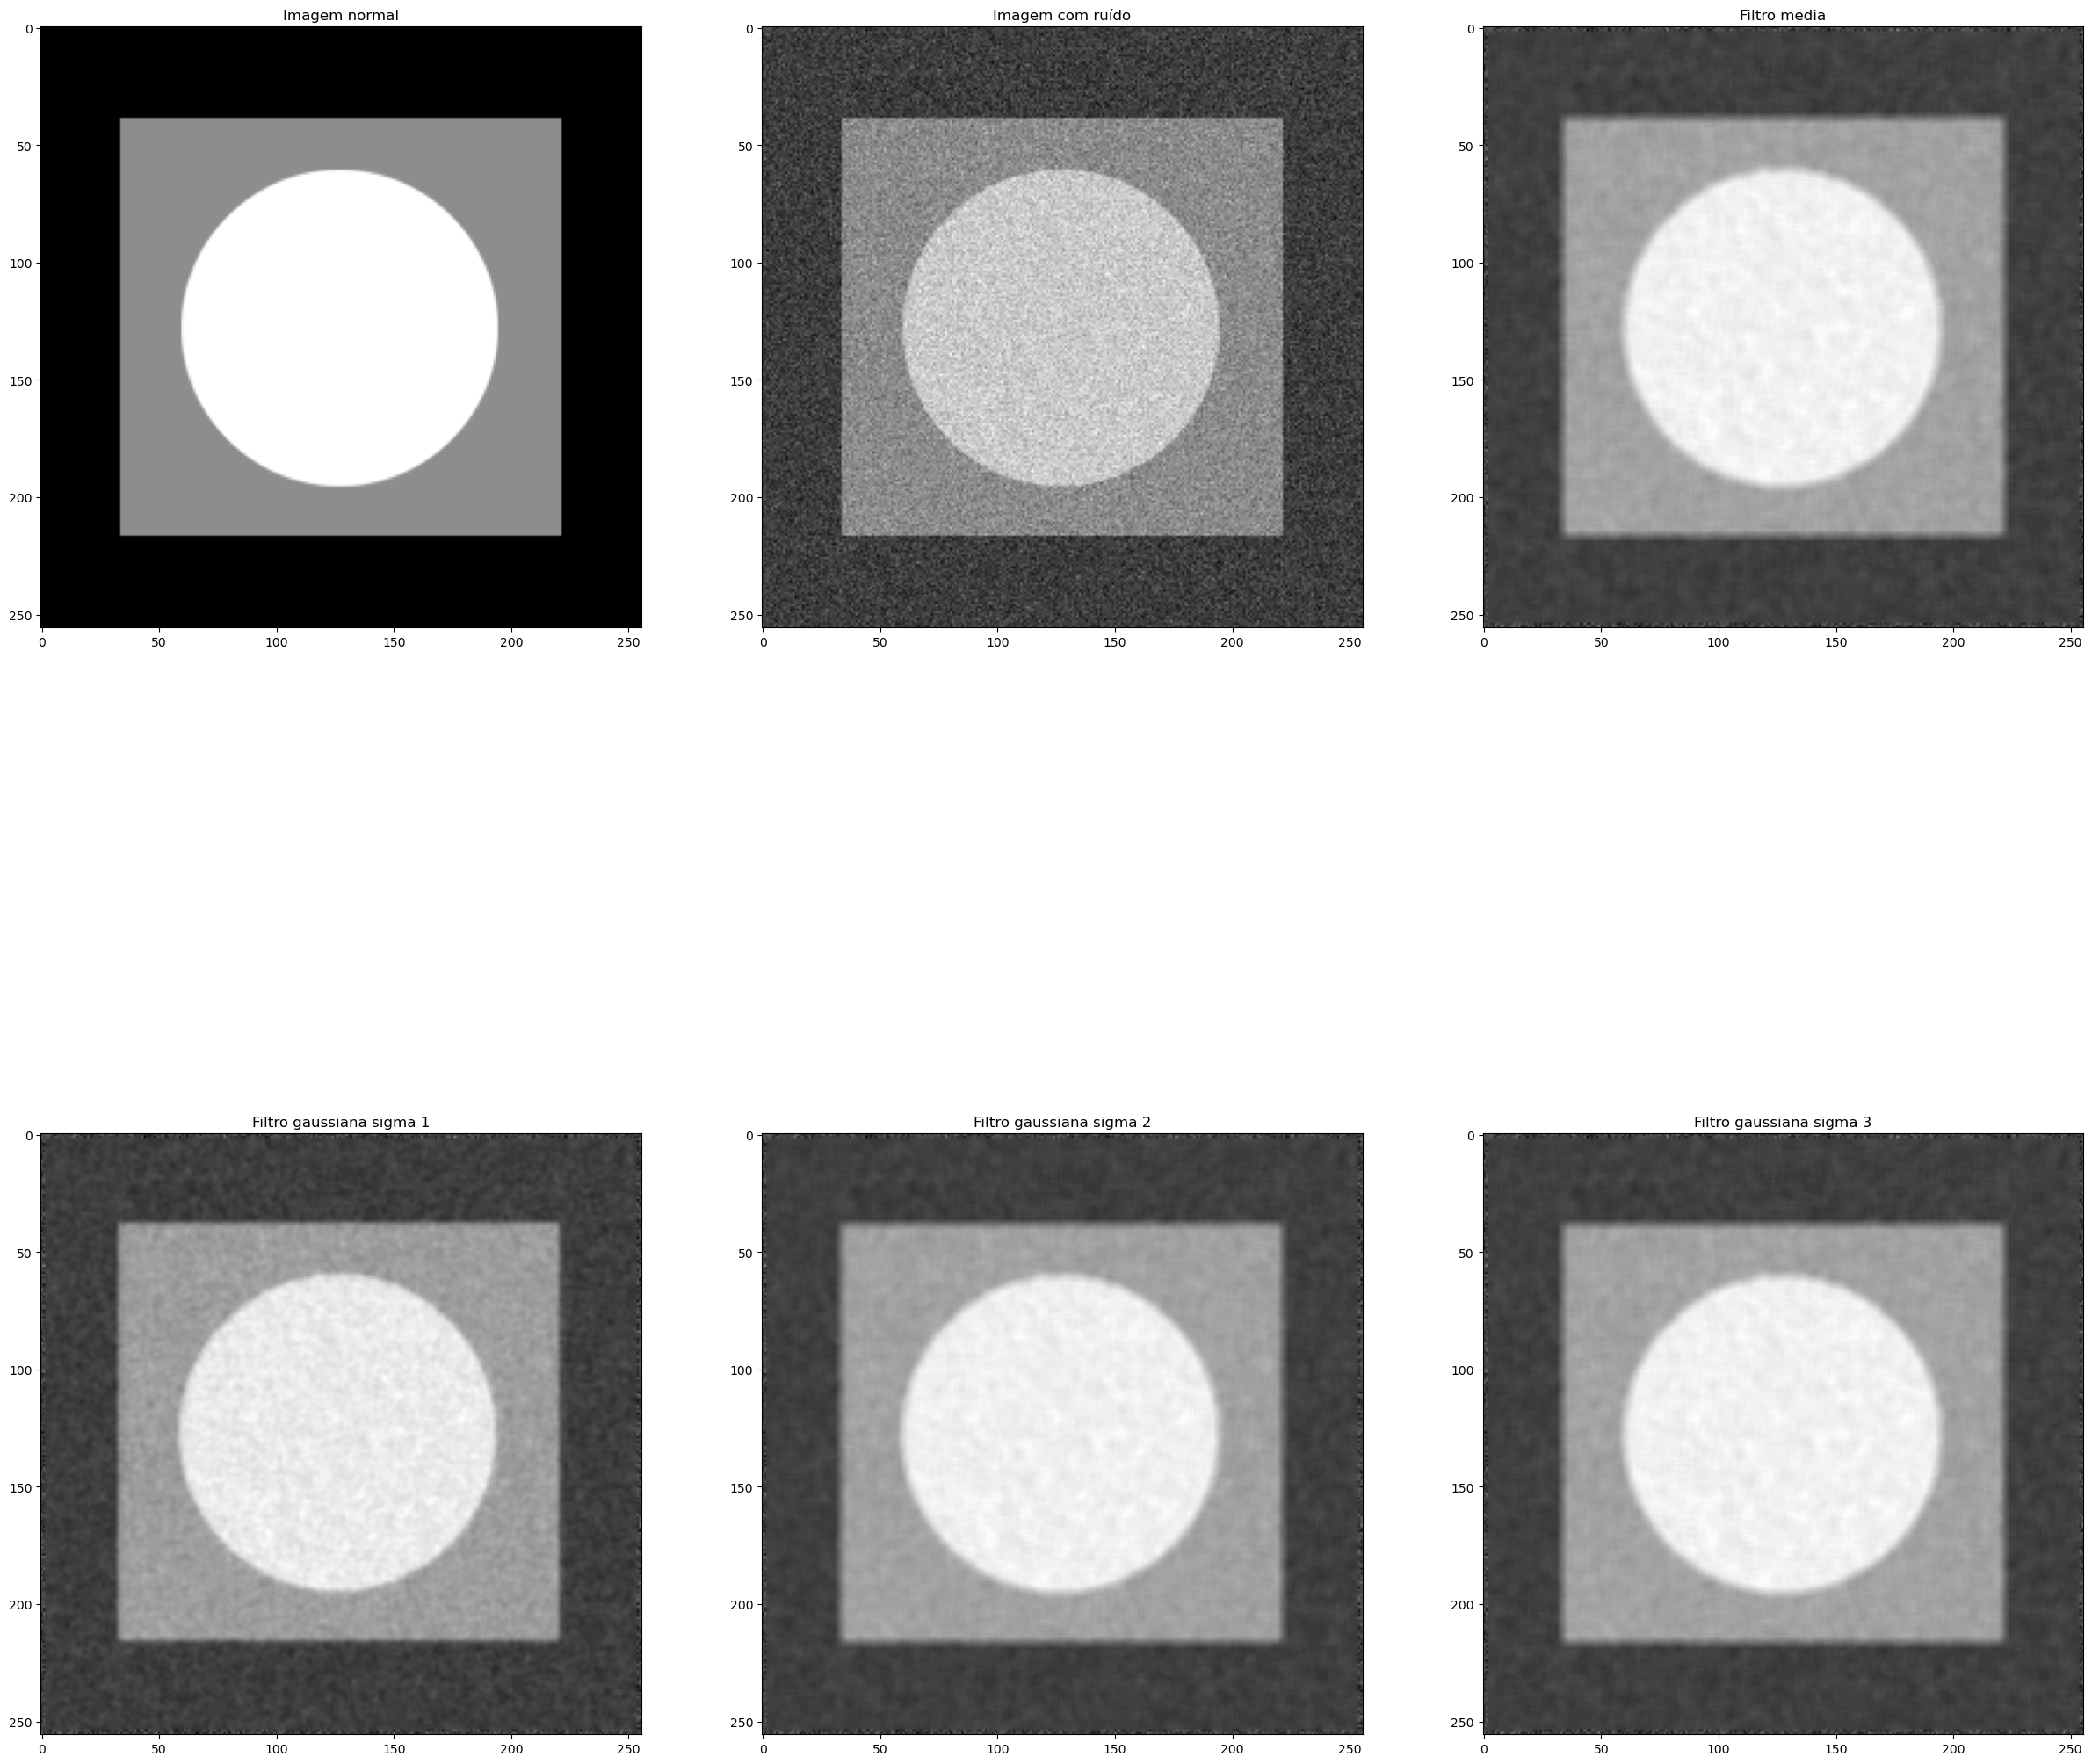

In [88]:
fig = plt.figure(figsize = (30, 30))
plt.subplot(2, 3, 1)
plt.imshow(imagemNormal, cmap='gray')
plt.title('Imagem normal')
plt.subplot(2, 3, 2)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem com ruído')
plt.subplot(2, 3, 3)
plt.imshow(img_media, cmap='gray')
plt.title('Filtro media')
plt.subplot(2, 3, 4)
plt.imshow(img_gaussiana1, cmap='gray')
plt.title('Filtro gaussiana sigma 1')
plt.subplot(2, 3, 5)
plt.imshow(img_gaussiana2, cmap='gray')
plt.title('Filtro gaussiana sigma 2')
plt.subplot(2, 3, 6)
plt.imshow(img_gaussiana3, cmap='gray')
plt.title('Filtro gaussiana sigma 3')




Ruídos gaussiano são caracterizados por serem suaves, contínuos e aleratórios, ocorrendo 'em decorrência de fatores como o ruído de circuitos eletrônicos e o ruído de sensores de imagem em virtude de iluminação insuficiente ou alta temperatura'. Sendo assim, é utilizado filtros de média e gaussiano a fim de reduzir grande parte  desse tipo de ruído, haja vista que ajudam a  reduzir flutuações abruptas e pequenas variações de intensidade, consequetemente melhorando a qualidade da imagem e diminuindo os ruídos. No entanto, não são tão eficazes para a redução de ruídos impulsivos como sal e pimenta.

A imagem com o filtro de média 5x5 está menos nítida, isso se deve ao fato de que os pixels da nova imagem são formados pela média de uma região de 25 quadrados vizinhos, portanto todos influenciam igualmente no pivo. Por conta do citado, há um grande problema de nitidez, de bordas e outras coisas.

O filtro gaussiano representa uma vantagem neste aspecto, haja vista que o mesmo é uma média ponderada, a qual a matriz do filtro é simétrica e os elementos centrais, ou seja mais perto do pivo, possuem maior importância. Dessa forma, o filtro gaussiano é melhor do que o filtro de média, pois a imagem tende a ser mais nítida além de eliminar melhor os ruídos gaussianos.

Além disso, variando o sigma e pela matriz dos filtros (h1, h2, h3) representados acima, percebe-se que quanto maior o sigma menor é a importância do pivo e mais próximo são os valores de cada pixel na média ponderado. Como também, visualmente é notório que quanto maior o sigma, mais a imagem filtrada se aproxima de uma media simples, portanto menor a nitidez da imagem.

Com todo acima, o melhor filtro foi o gaussiano de sigma 1/2, reduziando grande parte do ruído gaussiano, sendo que a imagem continua nítida e se aproxima mais da imagem original.





In [89]:
img2 = cv2.imread('Imagens/Fig0504(i)(salt-pepper-noise).tif', cv2.IMREAD_GRAYSCALE)
imgGaussiana1 =filtroTamanhoArbitrario(img2,h1)
imgMediana = filtro_mediana(img2)

Text(0.5, 1.0, 'Filtro mediana')

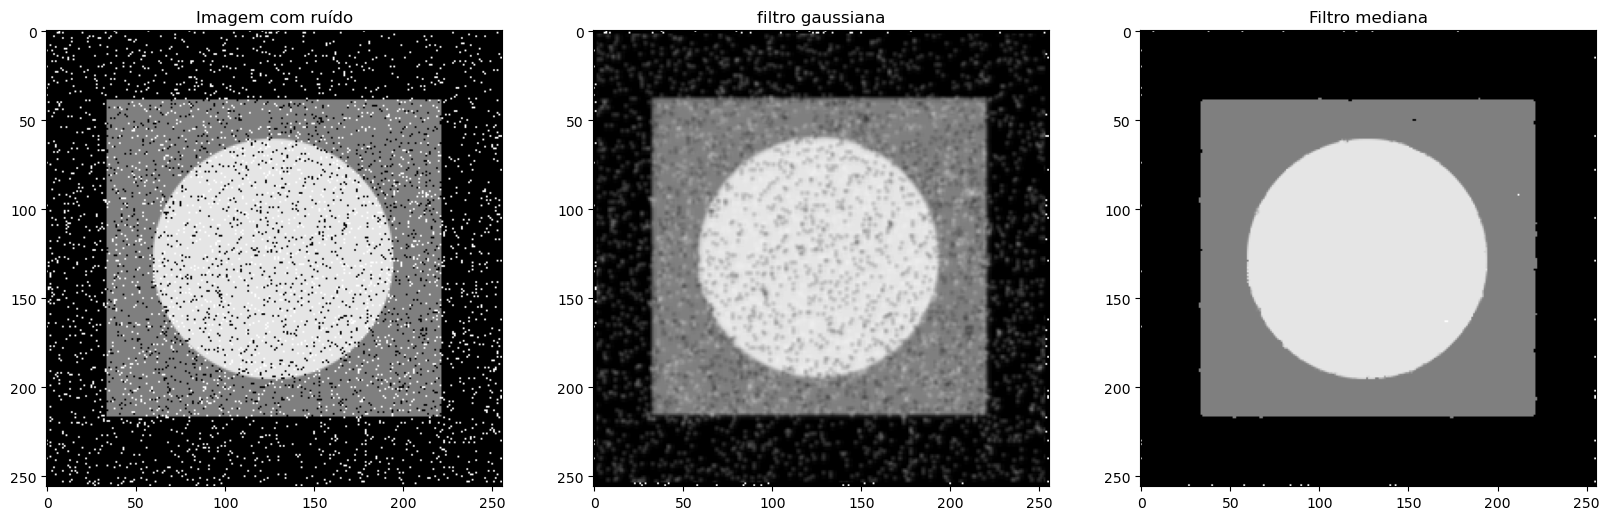

In [90]:
fig = plt.figure(figsize = (20, 20))
plt.subplot(1, 3, 1)
plt.imshow(img2, cmap='gray')
plt.title('Imagem com ruído')
plt.subplot(1, 3, 2)
plt.imshow(imgGaussiana1, cmap='gray')
plt.title('filtro gaussiana')
plt.subplot(1, 3, 3)
plt.imshow(imgMediana, cmap='gray')
plt.title('Filtro mediana')

 Ruídos sal e pimenta são resultados de pixels com valor 0 ou 255, apresentados regiões/pontos na imagem preto ou branco. Como já mencionado anteriormente, o filtro de gaussiana não é adequado para retirar ruídos sal e pimenta, isso se deve ao fato de que é realizado uma média ponderada na região analisada, consequentemente os ruídos citados impactarão na média da vizinhança, como também se forem o pivo impactarão ainda mais. Portanto, eles pernamecerão na nova imagem, como visto acima.
 
 Contudo, o filtro de mediana é o adequado para retirar os ruídos citados. Isso se deve a característica do filtro, haja vista que no mesmo é selecionado o valor central da região a qual o filtro está sendo aplicado, por conseguinte nunca será escolhido os extremos, que são a representação dos ruídos analisados. Logo, como visto na terceira imagem  são retirados os ruídos, sendo o filtro de mediana adequado para este caso e melhor do que o filtro gaussiano.